# Sonification of cell autophagy

This is an introductory notebook for the Sonification module in Musicalgestures that is specifically tailored to serve the AUTORHYTHM project. In this notebook we will create a dataset from a folder of images, view them and sonify them in two ways.

### Import necessary libraries

In [1]:
import os
import musicalgestures
from utils.dataset import folder2dataset, ImageSequence
from utils.dsp import image2sines

### Create dataset

Here we use the `folder2datset` function to parse a folder of images, and return a dataset (a `pandas.DataFrame`) based on the info we parse from the file naming scheme, and from the contents of the images. Then we take this dataset and create an `ImageSequence` object with it. This object will make it easier to interact with our images in the dataset.

In [2]:
# create dataset
images_folder = r"C:\Users\Balint Laczko\Desktop\work\Sonification\210226_ RRI" # path to folder
ds = folder2dataset(images_folder) # parse folder into a dataset (pandas.DataFrame)
seq = ImageSequence(ds) # class to interact with the dataset
seq.sequence.head() # see the first bit of the dataset that is available at ImageSequence.sequence

,date,stage,group,step,fed,visiting_point,color_space,width,height,pixel_min,pixel_max,path
0,20210226,bst,esf,0,1,1,na,2040,2034,0,5,C:\Users\Balint Laczko\Desktop\work\Sonificati...
1,20210226,bst,esf,0,1,1,gfp,2040,2034,93,915,C:\Users\Balint Laczko\Desktop\work\Sonificati...
2,20210226,bst,esf,0,1,1,rfp,2040,2034,92,1491,C:\Users\Balint Laczko\Desktop\work\Sonificati...
3,20210226,bst,esf,0,1,1,rgb,2040,2034,0,6,C:\Users\Balint Laczko\Desktop\work\Sonificati...
4,20210226,bst,esf,0,1,2,na,2040,2034,0,7,C:\Users\Balint Laczko\Desktop\work\Sonificati...


### Save the dataset as a csv

Now that we have the dataset, we can save it to a csv file. When you open this csv in a data sheet program (like Excel) be sure to choose comma separation.

In [3]:
# save dataset to csv
out_csv = os.path.join(os.path.dirname(images_folder), "autophagy_images.csv") # save it next to our input folder
seq.save_dataset(out_csv)

### Viewing images

To view an image in our image sequence, use the `view` method. You can specify a step (where BST counts as step 0), a visiting point, and a color space. Most often it is also useful to normalize the image, with `norm_percentile` around 99 to ignore extremes and get a balanced normalization. You can use `scale` to change the size of the image (`scale=1` is the original size).

In [4]:
# view an entry
seq.view(step=0, visiting_point=1, color_space="gfp", normalize=True, norm_percentile=99, scale=0.5)
seq.view(step=0, visiting_point=1, color_space="rfp", normalize=True, norm_percentile=99, scale=0.5)

Using the unique values in the "step" column of our dataset, we can use this trick to cycle through a sequence in a specific visiting point and color space.

In [5]:
# view the series at visiting point 1, GFP color
for step in seq.sequence["step"].unique().tolist():
    seq.view(step=step, visiting_point=1, color_space="gfp", normalize=True, norm_percentile=99, scale=0.25)

### Rendering images and videos

Sometimes it can be useful to render the normalized version of an image, for viewing or publishing online. We can use the `render_image` method for this.

In [6]:
# render image
target_pic = os.path.join(os.path.dirname(images_folder), "rendered_image.png") # render an image next to the input folder
image = seq.render_image(step=1, visiting_point=1, color_space="gfp", target_name=target_pic, norm_percentile=99)
image

'C:/Users/Balint Laczko/Desktop/work/Sonification/rendered_image_2.png'

Similarly, we can use `render_video` to render all the steps into a video.

In [7]:
# render video
target_video = os.path.join(os.path.dirname(images_folder), "rendered_video.avi") # render a video next to the input folder
video = seq.render_video(visiting_point=1, color_space="rfp", target_name=target_video, norm_percentile=99)
video

Rendering image sequence: |████████████████████████████████████████| 100.0% Complete


'C:/Users/Balint Laczko/Desktop/work/Sonification/rendered_video_0.avi'

Finally, we can render motiongrams from this video. These will be images that summarize motion in the x and y axes of a video. To do this, we can create an `MgVideo` object from the video path, and simply call its `motiongrams` method.

In [8]:
# render motiongrams
motiongrams = musicalgestures.MgVideo(video).motiongrams() # create an MgVideo object and call motiongrams()
motiongrams

Rendering motion-grams: |████████████████████████████████████████| 100.0% Complete


MgList('[MgImage('C:/Users/Balint Laczko/Desktop/work/Sonification/rendered_video_0_mgx.png'), MgImage('C:/Users/Balint Laczko/Desktop/work/Sonification/rendered_video_0_mgy.png')]')

Here are our motiongrams:

In [9]:
# create embedded view of motiongrams in notebook
motiongrams.show(mode="notebook")

## Sonify an image: two methods

Now let's look at two basic ways to sonify the motiongrams. We can either interpret the images as FFT spectra and sonify them via an inverse FFT calculation (using `image2spectrum`) or we can use additive synthesis to "translate" the image to a collection of sine waves (using `image2sines`).

### As a spectrum

** UPDATE ** the Pyo package (that is used in the image2spectrum function) only supports Python 3.9 or lower and is therefore deprecated from this project.

For the inverse FFT process we can use the `image2spectrum` function that uses the `pyo` library. We can specify a desired length of the output sound in seconds using the `out_length` parameter, and the dimension of the image we want to use as the time dimension (either "width" or "height").

In [10]:
# sonify motiongrams
# mgx
mgx_path = motiongrams[0].filename
mgx_synth_path = os.path.join(os.path.dirname(images_folder), "mgx_spectrum.wav")
# image2spectrum(mgx_path, mgx_synth_path, out_length=10, time_dim="height")

# mgy
mgy_path = motiongrams[1].filename
mgy_synth_path = os.path.join(os.path.dirname(images_folder), "mgy_spectrum.wav")
# image2spectrum(mgy_path, mgy_synth_path, out_length=10, time_dim="width")

### View spectra

MgFigure(figure_type='audio.spectrogram')

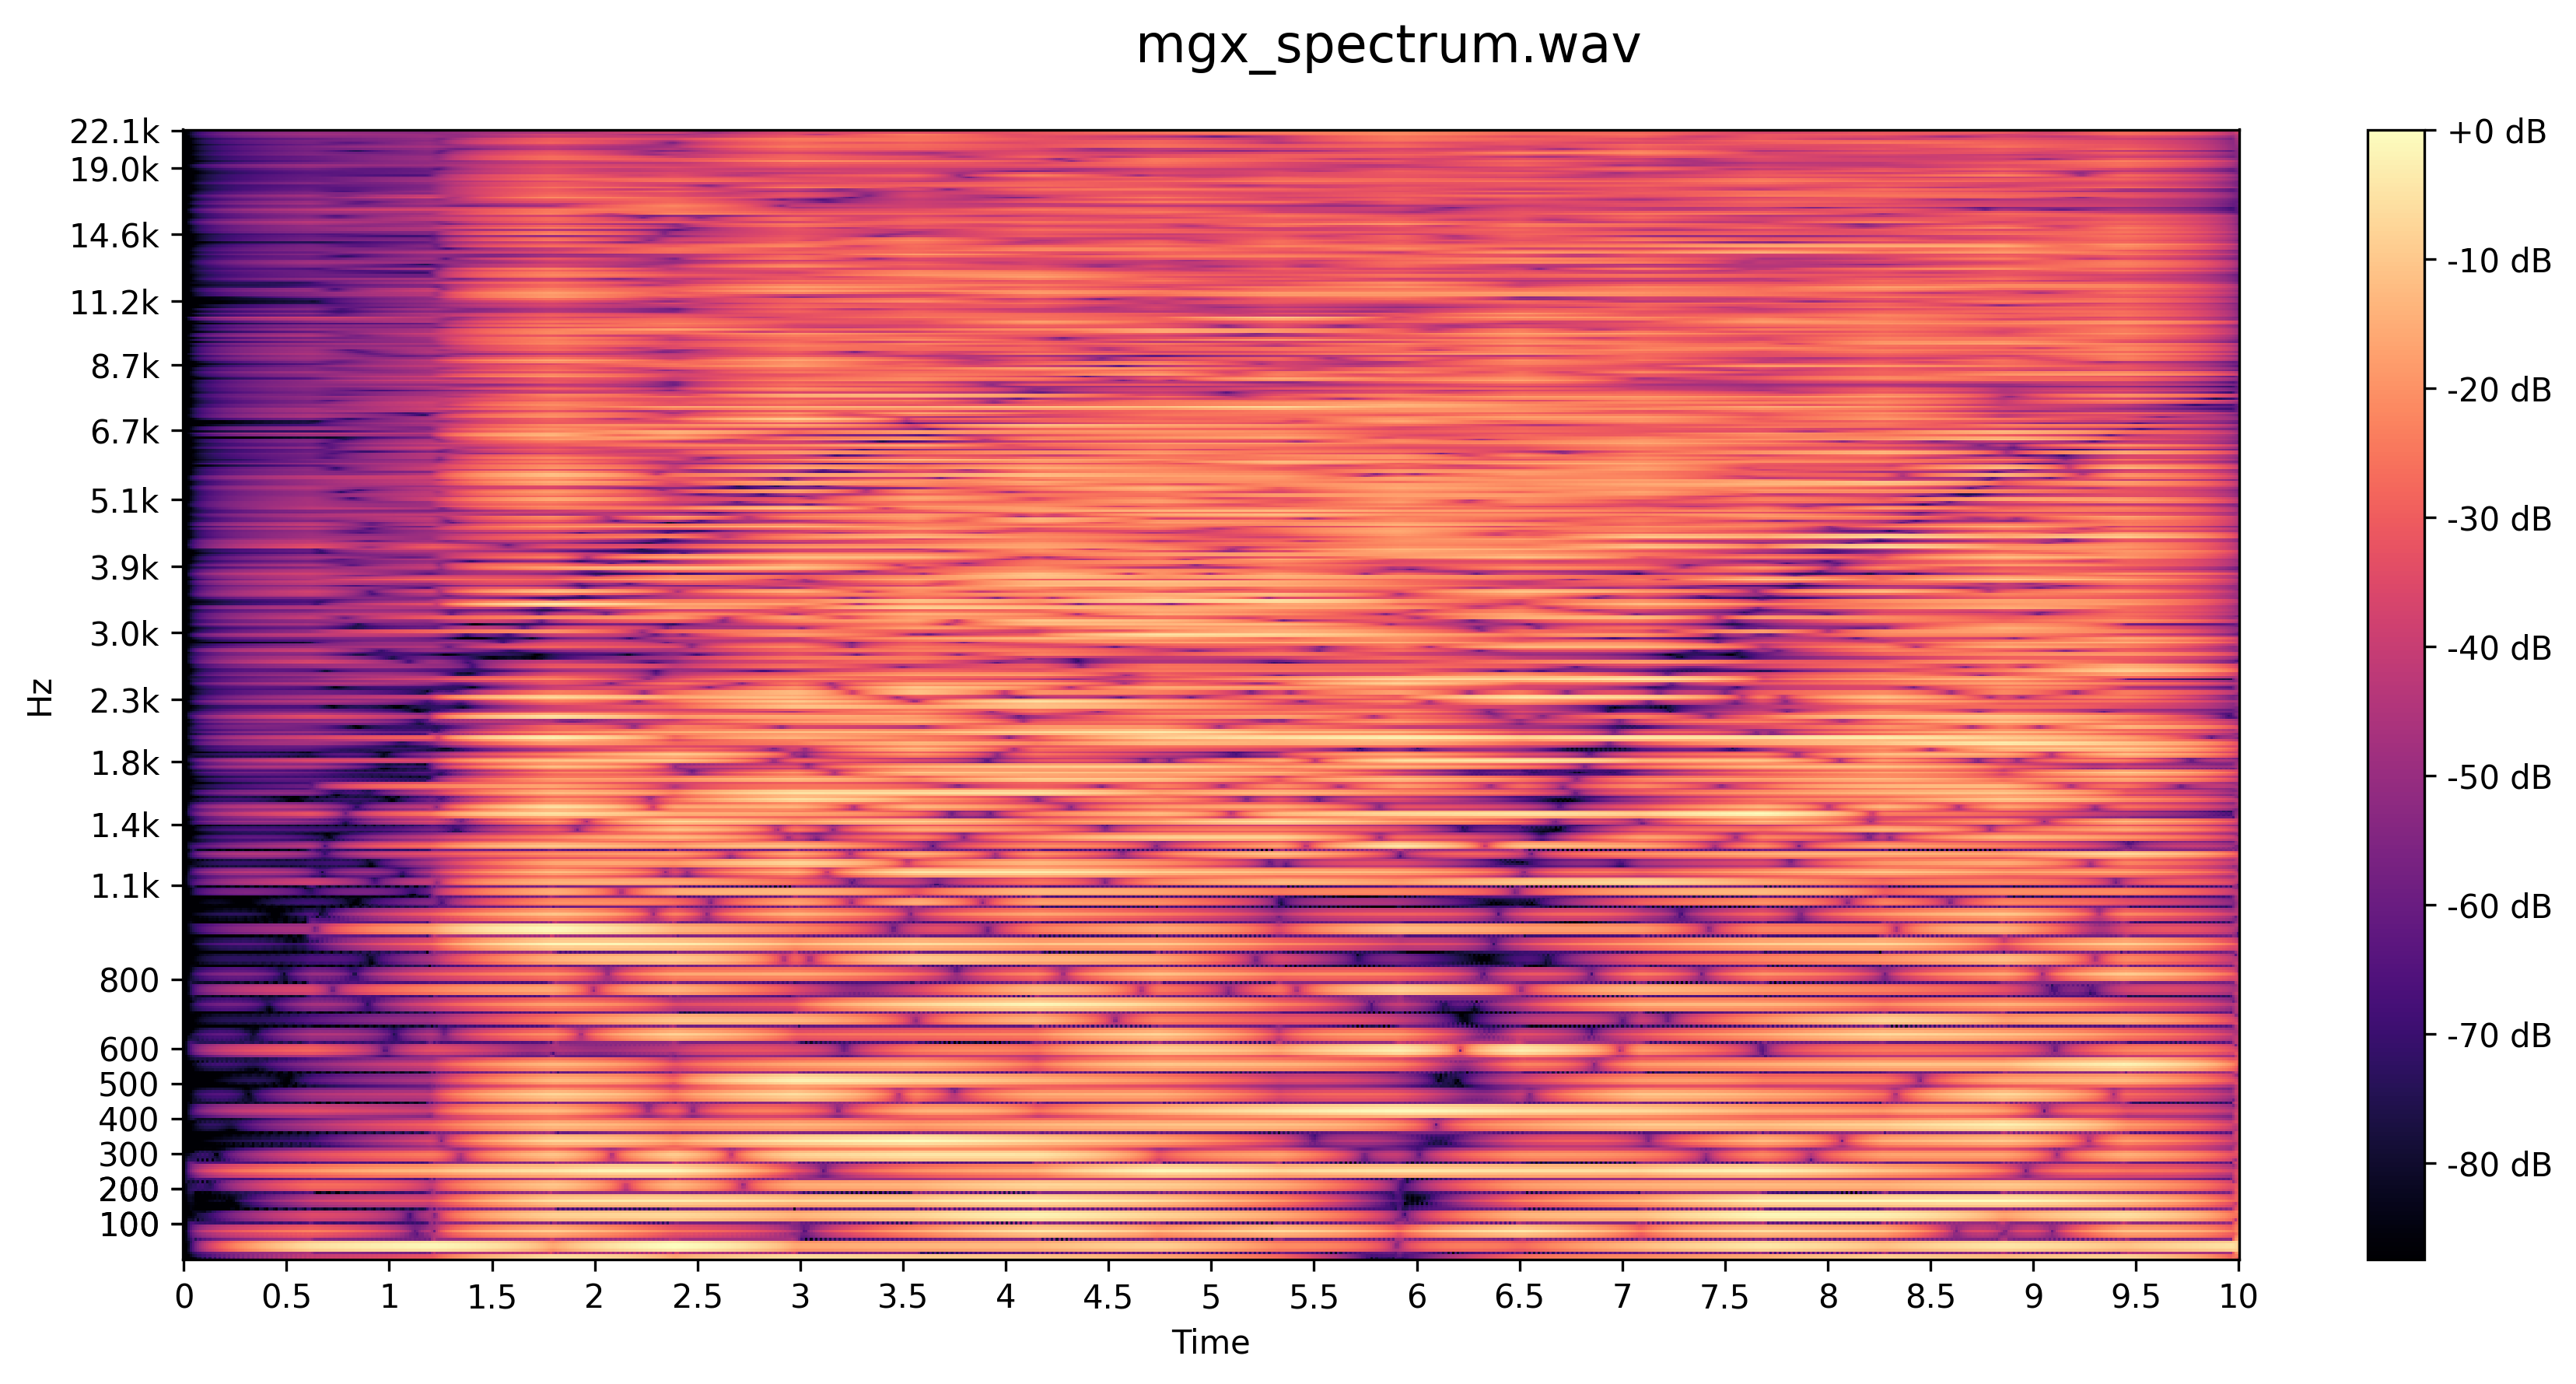

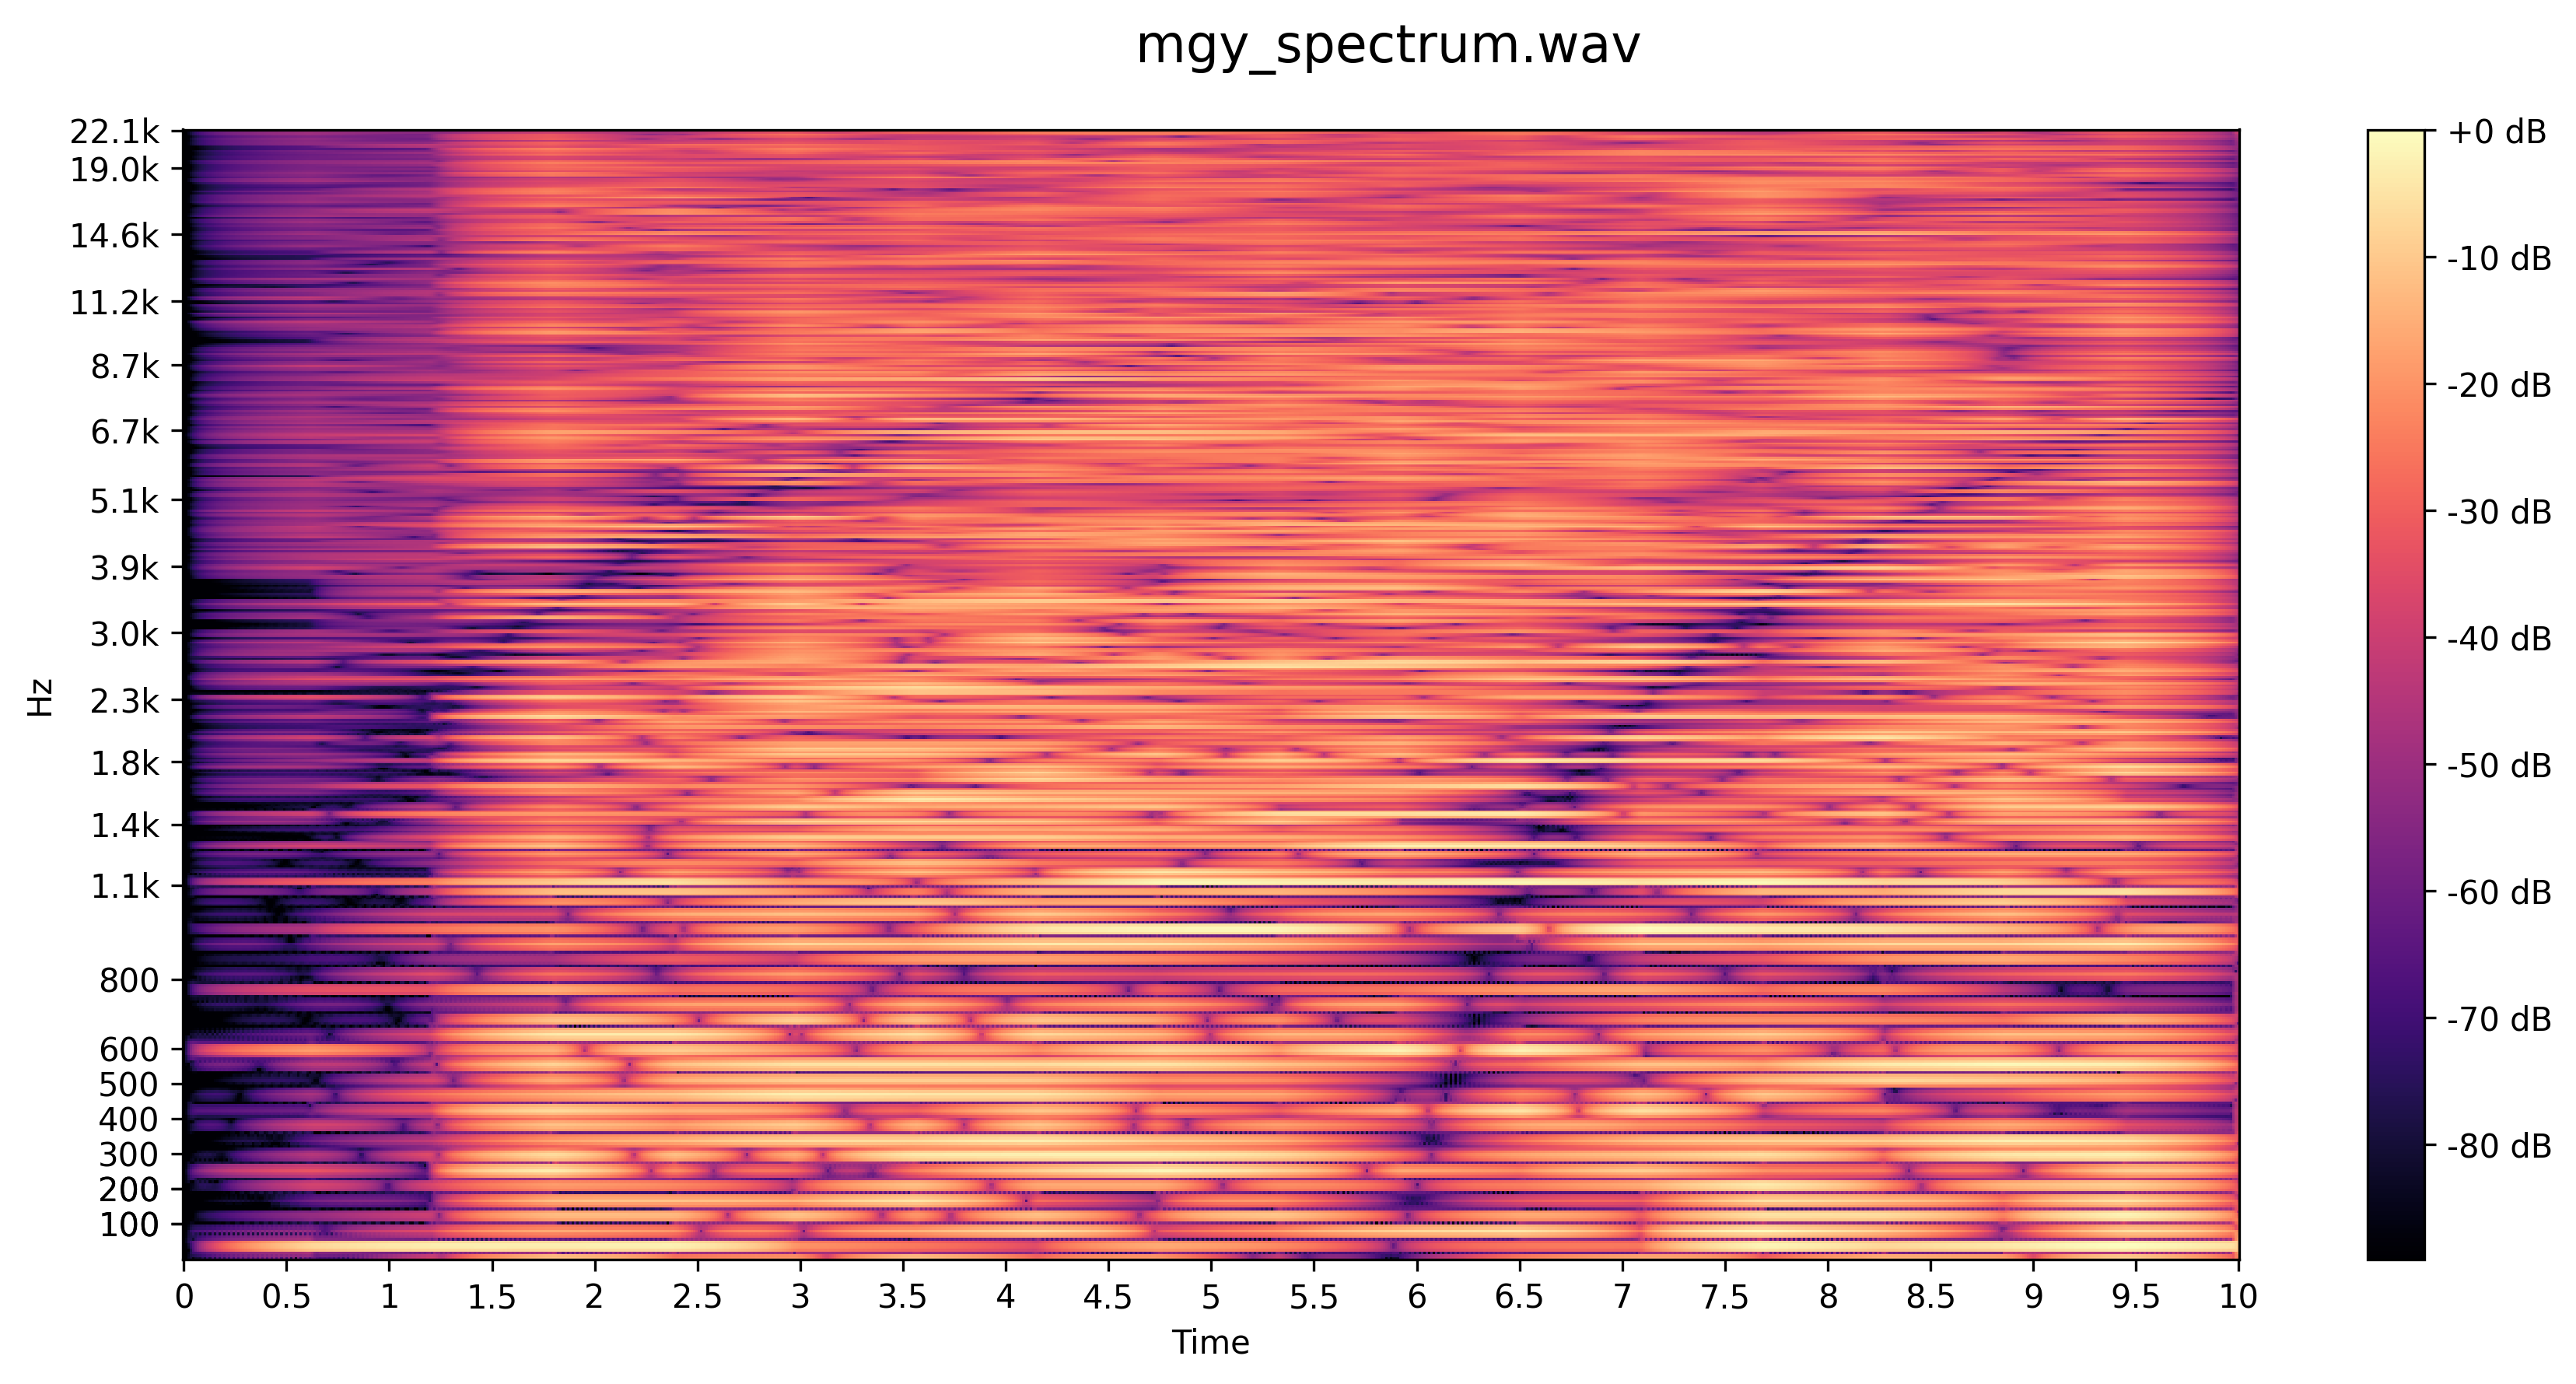

In [11]:
from musicalgestures._audio import mg_audio_spectrogram
mg_audio_spectrogram(mgx_synth_path)
mg_audio_spectrogram(mgy_synth_path)

# With additive synthesis

In [12]:
# sonify motiongrams
# mgx
mgx_path = motiongrams[0].filename
mgx_synth_path = os.path.join(os.path.dirname(images_folder), "mgx_sines.wav")
image2sines(mgx_path, mgx_synth_path, out_length=10, time_dim="height", num_sines=20)

# mgy
mgy_path = motiongrams[1].filename
mgy_synth_path = os.path.join(os.path.dirname(images_folder), "mgy_sines.wav")
image2sines(mgy_path, mgy_synth_path, out_length=10, time_dim="width", num_sines=20)

MgFigure(figure_type='audio.spectrogram')

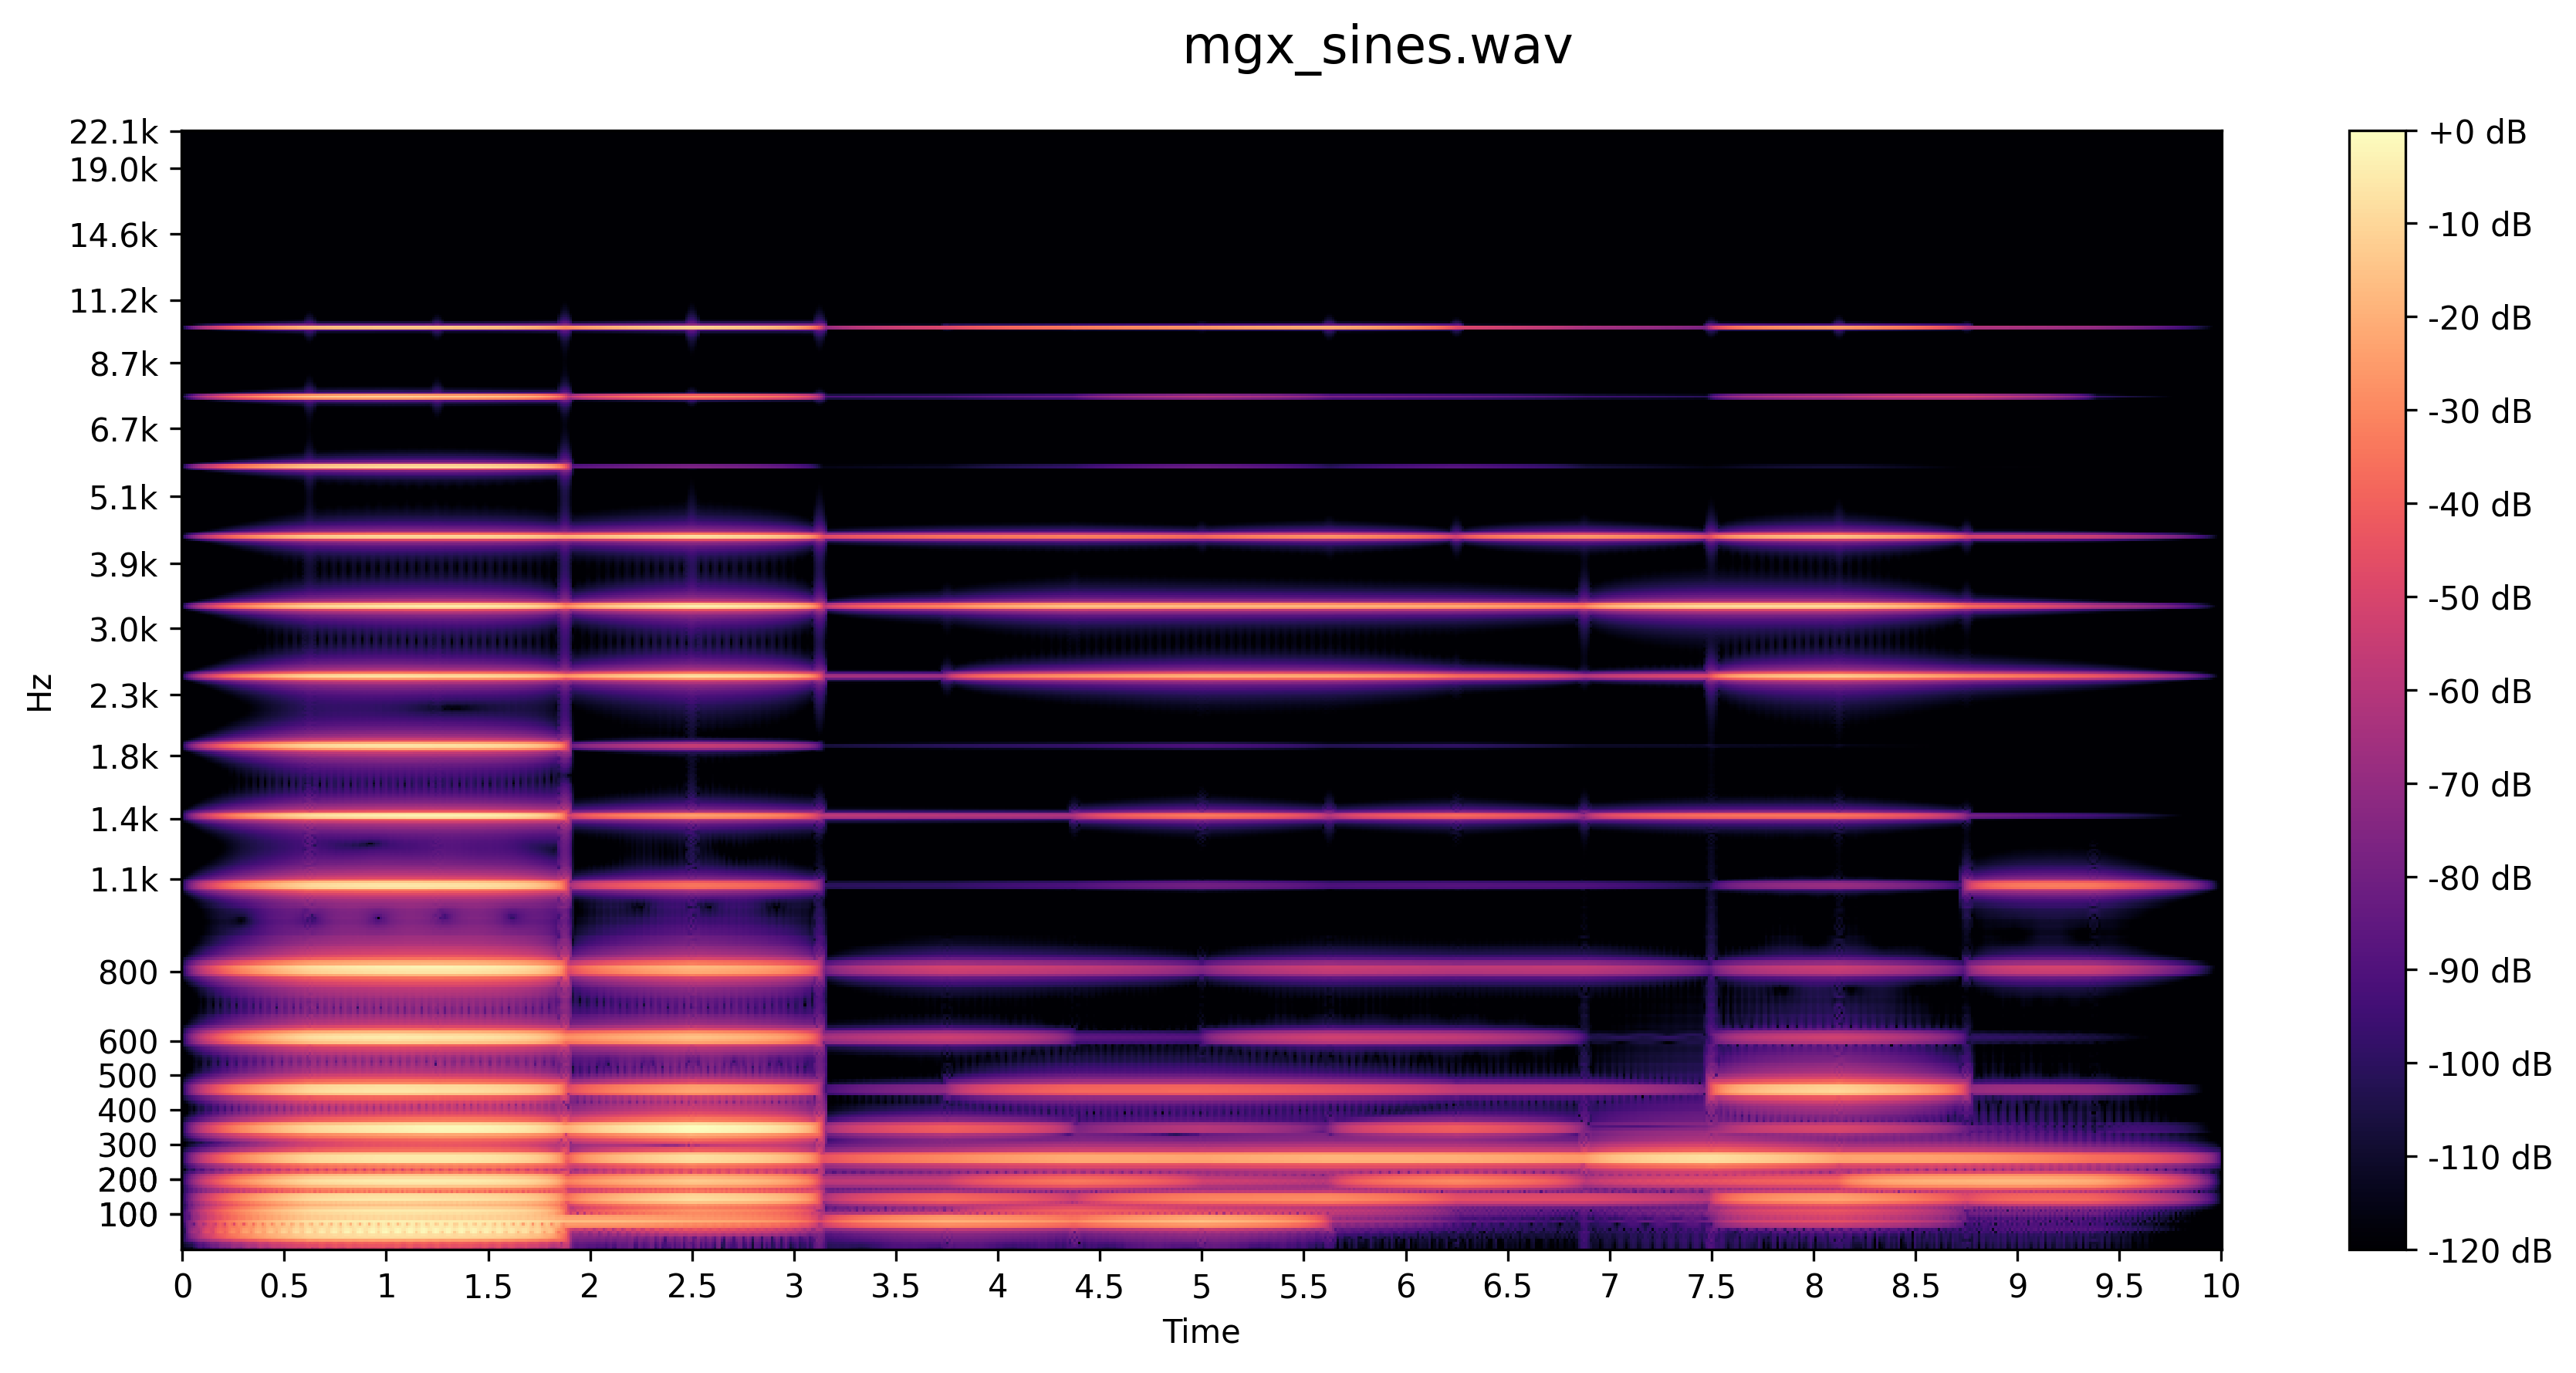

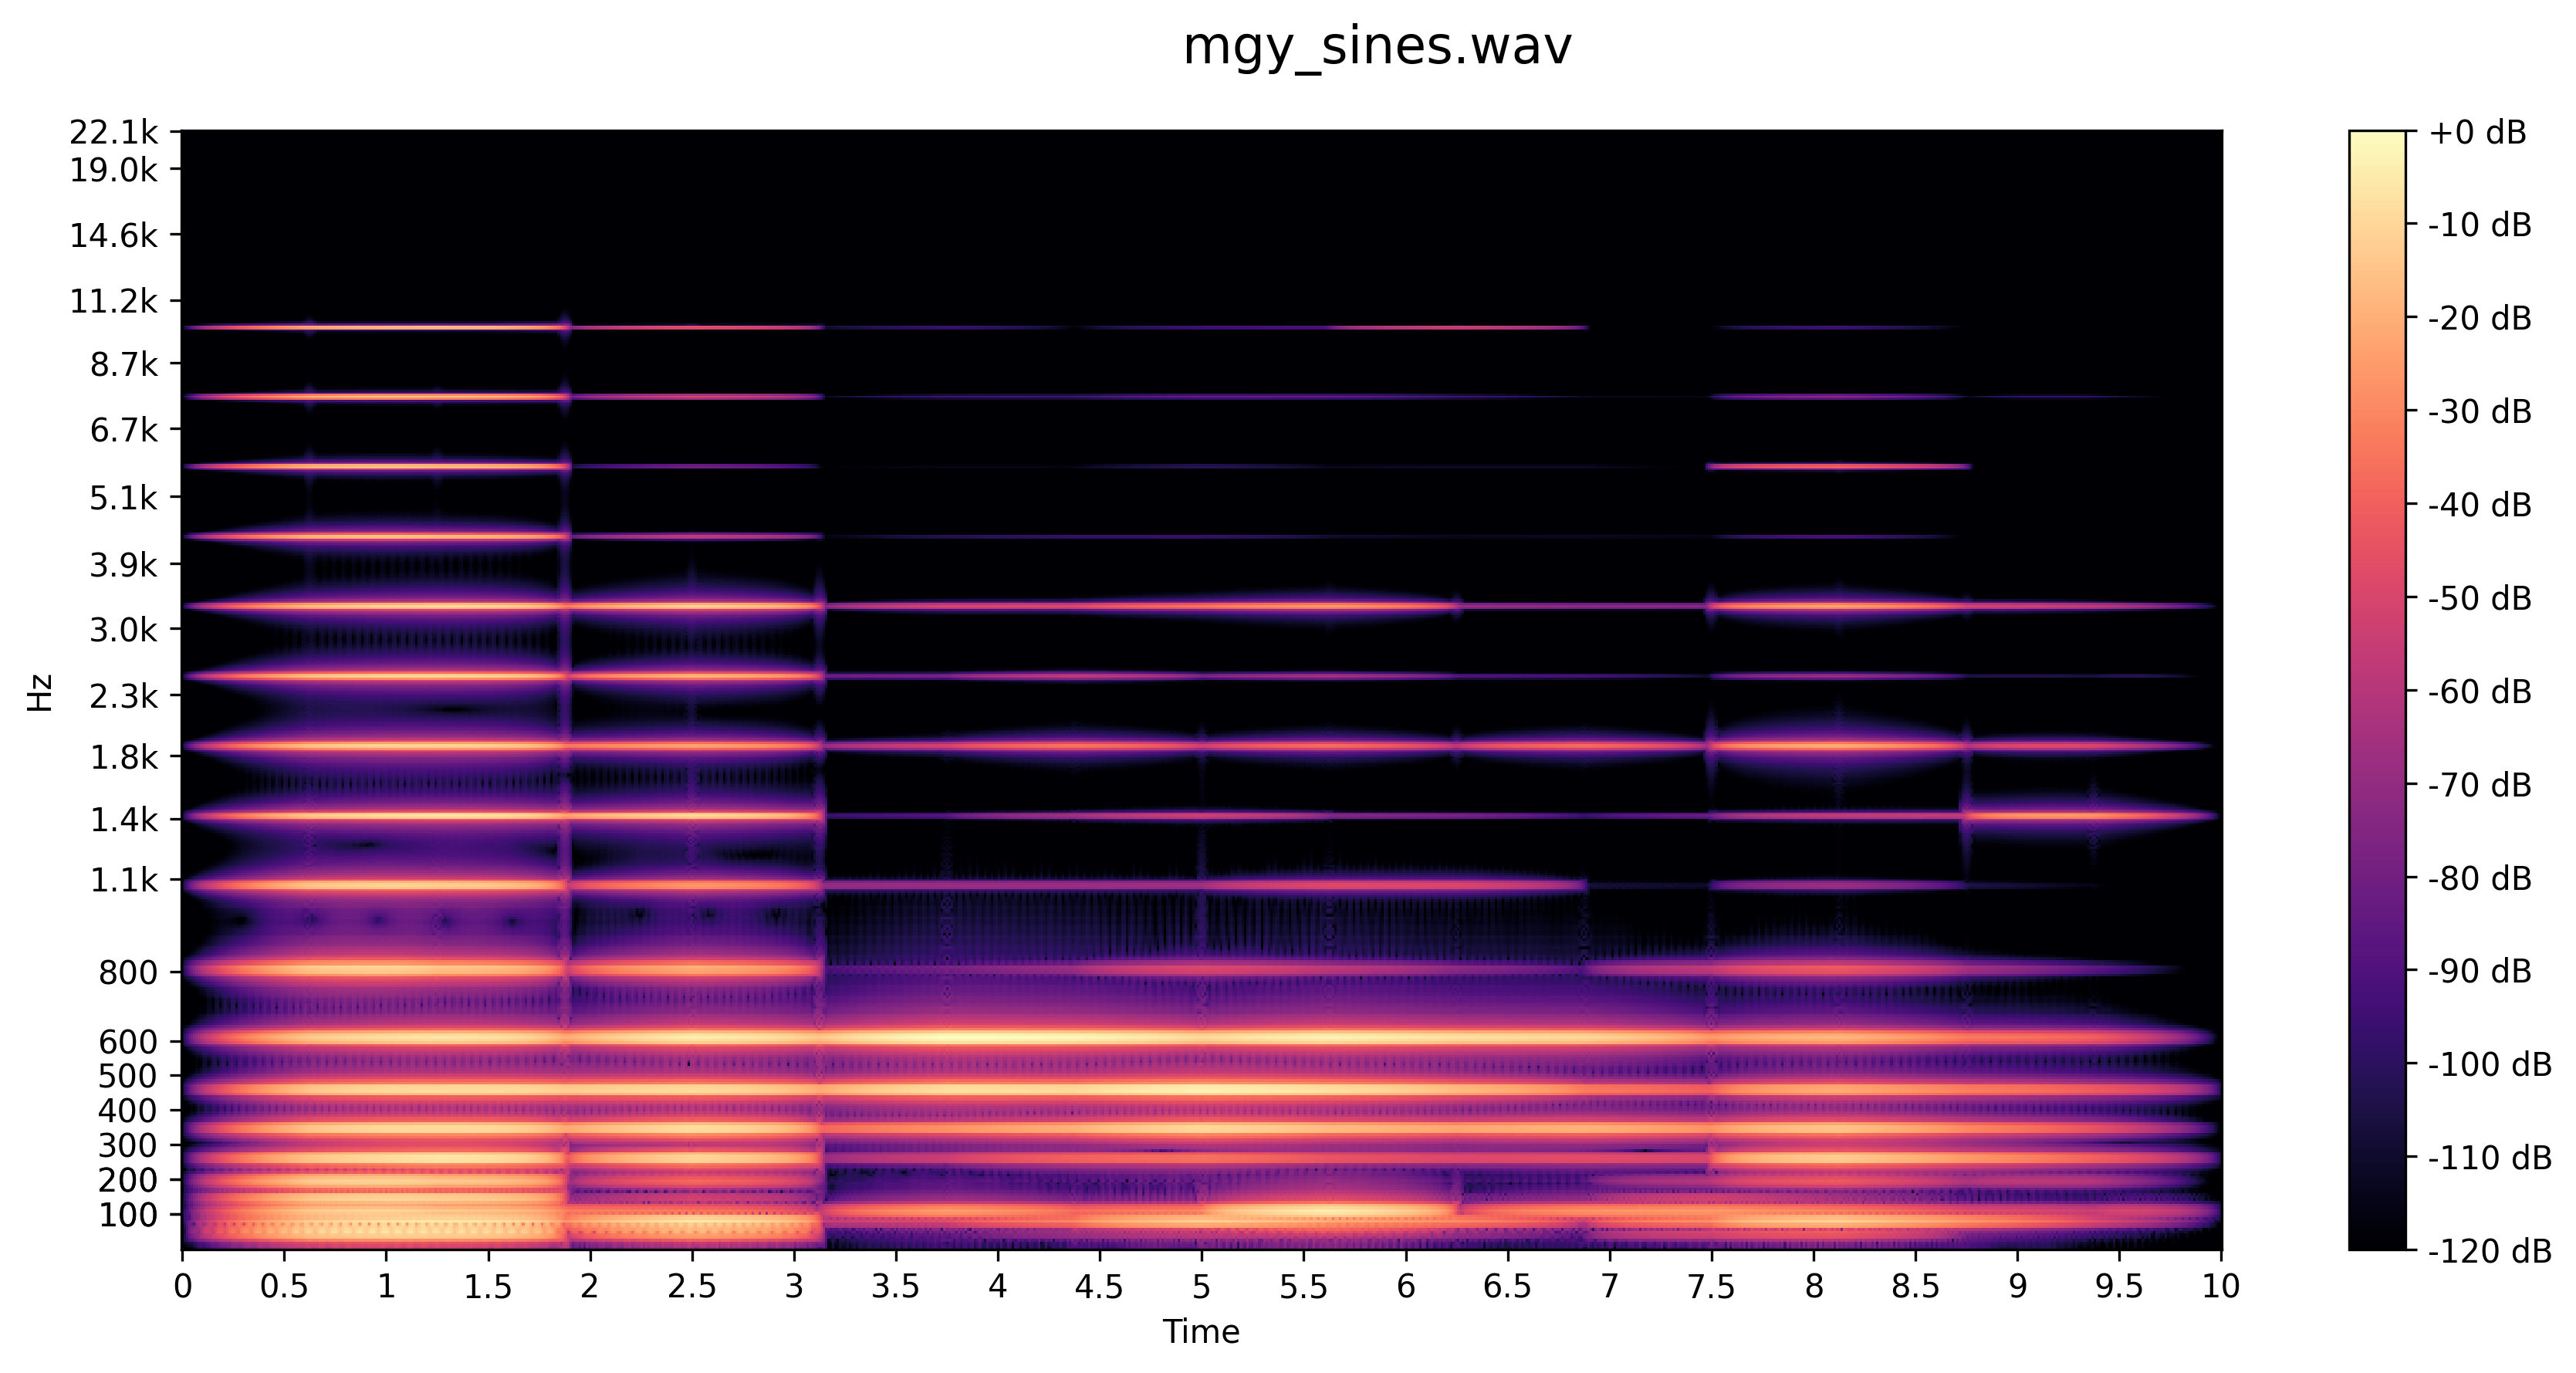

In [13]:
mg_audio_spectrogram(mgx_synth_path)
mg_audio_spectrogram(mgy_synth_path)